In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/padhai-text-non-text-classification-level-2/padhai.py
/kaggle/input/padhai-text-non-text-classification-level-2/sample_submission_level_2.csv
/kaggle/input/padhai-text-non-text-classification-level-2/level_2_train/level_2/en/c37_2.jpg
/kaggle/input/padhai-text-non-text-classification-level-2/level_2_train/level_2/en/c27_44.jpg
/kaggle/input/padhai-text-non-text-classification-level-2/level_2_train/level_2/en/c36_18.jpg
/kaggle/input/padhai-text-non-text-classification-level-2/level_2_train/level_2/en/c39_14.jpg
/kaggle/input/padhai-text-non-text-classification-level-2/level_2_train/level_2/en/c44_12.jpg
/kaggle/input/padhai-text-non-text-classification-level-2/level_2_train/level_2/en/c3_76.jpg
/kaggle/input/padhai-text-non-text-classification-level-2/level_2_train/level_2/en/c23_22.jpg
/kaggle/input/padhai-text-non-text-classification-level-2/level_2_train/level_2/en/c45_43.jpg
/kaggle/input/padhai-text-non-text-classification-level-2/level_2_train/level_2/en/c40_70.jpg


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, log_loss
import operator
import json
from IPython import display
import os
import warnings

In [3]:
import glob
def dir(paths,L=[]):
    #for i in path:
    for infile in glob.glob(os.path.join(paths,'*.*')):
        L.append(infile)
L1 = []
L2 = []
L3 = []
L4 = []
L5 = []
paths = dir("/kaggle/input/padhai-text-non-text-classification-level-2/level_2_train/level_2/ta",L1)
paths = dir("/kaggle/input/padhai-text-non-text-classification-level-2/level_2_train/level_2/hi",L2)
paths = dir("/kaggle/input/padhai-text-non-text-classification-level-2/level_2_train/level_2/en",L3)
paths = dir("/kaggle/input/padhai-text-non-text-classification-level-2/level_2_train/level_2/background",L4)

paths = dir("/kaggle/input/padhai-text-non-text-classification-level-2/level_2_test/kaggle_level_2",L5)
print (len(L5))

300


In [4]:
L6 = []
for j in range(300):
    L6.append([L5[j][i:i+1] for i in range(0, len(L5[0]), 1)][86:])
#print(len(L6))
L7 = []
for k in range(300):
    L7.append(L6[k][:3])
    
L8 = []
for l in range(300):
    res = "".join(L7[l])
    L8.append(res)

for n,i in enumerate(L8):
    if i == '1.j':
        L8[n] = '1.'
    elif i == '2.j':
        L8[n] = '2.'
    elif i == '3.j':
        L8[n] = '3.'
    elif i == '4.j':
        L8[n] = '4.'
    elif i == '5.j':
        L8[n] = '5.'
    elif i == '6.j':
        L8[n] = '6.'
    elif i == '7.j':
        L8[n] = '7.'
    elif i == '8.j':
        L8[n] = '8.'
    elif i == '9.j':
        L8[n] = '9.'
    elif i == '0.j':
        L8[n] = '0.'
L9 = []
for m in range(300):
    n=float(L8[m])
    L9.append(n)
L10 = []
for o in range(300):
    p = int(L9[o])
    L10.append(p)
len(L10)

300

In [5]:
print(L10)

[171, 249, 82, 163, 16, 0, 83, 89, 240, 7, 173, 283, 69, 143, 43, 123, 211, 231, 215, 187, 104, 213, 259, 96, 178, 223, 164, 193, 152, 219, 225, 273, 228, 209, 61, 66, 146, 59, 222, 248, 242, 22, 170, 295, 90, 35, 202, 31, 265, 73, 226, 18, 100, 110, 292, 294, 153, 161, 68, 286, 119, 258, 134, 45, 80, 4, 254, 218, 241, 129, 28, 293, 186, 262, 256, 44, 74, 208, 50, 58, 205, 266, 140, 56, 216, 41, 198, 180, 25, 239, 133, 150, 268, 287, 236, 204, 280, 179, 279, 79, 54, 19, 278, 189, 135, 245, 95, 102, 108, 30, 5, 2, 11, 210, 62, 39, 212, 199, 63, 182, 156, 47, 24, 20, 188, 167, 126, 17, 207, 8, 112, 155, 103, 141, 109, 138, 290, 263, 190, 132, 147, 15, 115, 26, 114, 72, 185, 282, 250, 272, 151, 48, 244, 165, 32, 251, 38, 70, 184, 159, 194, 276, 224, 271, 238, 162, 65, 55, 288, 195, 229, 196, 243, 67, 166, 237, 177, 264, 289, 37, 145, 168, 232, 87, 113, 154, 42, 128, 3, 40, 51, 57, 136, 291, 203, 137, 192, 247, 176, 158, 86, 78, 13, 94, 12, 10, 120, 275, 49, 64, 98, 270, 27, 33, 101, 77, 2

In [6]:
from PIL import Image

def im(L=[]):
    data1 = []
    for i in L:
        img = Image.open(i).convert('L')
        WIDTH, HEIGHT = img.size
        data = list(img.getdata())
        data = [data[offset:offset+WIDTH] for offset in range(0, WIDTH*HEIGHT, WIDTH)]
        dataT = []
        for j in data:
            dataT.extend(j)
        data1.append(dataT)
    column = [i for i in range(256)]
    df = pd.DataFrame(data1,columns=column)
    return(df)

df1 = im(L1)
df1['256']=1
df2 = im(L2)
df2['256']=1
df3 = im(L3)
df3['256']=1
df4 = im(L4)
df4['256']=0

df5 = im(L5)

df = pd.concat([df1,df2,df3,df4])
data = df.sample(frac=1).reset_index(drop=True)
print(data)

       0    1    2    3    4    5    6    7    8    9  ...  247  248  249  \
0    255  238  255  255  245  255  255  255  244  255  ...  248  255  255   
1     41  119   95  148   58  219   63  120   35  182  ...   27   50   30   
2     99  255   46   49  188  190   92   53  230    2  ...   43  123  147   
3     12  186  148  197  111   35  238  111  160   59  ...   49   87  156   
4    250  251  252  255  246  244  242  255  255  237  ...  245  255  242   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
895  252  255  253  255  255  255  245  255   12  233  ...  248  254  233   
896  254   24  130   76  226   92  207   39  134   99  ...  107  158   20   
897  177  157   48  236  135  193   45  241  129  135  ...   81  110   89   
898  255  254  250  247  255  239  255  241   13  231  ...  250  255  255   
899  252  255  255  248  255  255  245  255  255  255  ...  241  254  255   

     250  251  252  253  254  255  256  
0    255  255  254  254  252  252 

In [7]:
Y = data.copy()
Y_train = Y['256']
X_train = Y.drop('256', axis = 1)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,255,238,255,255,245,255,255,255,244,255,...,255,248,255,255,255,255,254,254,252,252
1,41,119,95,148,58,219,63,120,35,182,...,169,27,50,30,177,68,67,141,58,59
2,99,255,46,49,188,190,92,53,230,2,...,255,43,123,147,22,18,97,61,105,202
3,12,186,148,197,111,35,238,111,160,59,...,21,49,87,156,145,160,0,0,220,181
4,250,251,252,255,246,244,242,255,255,237,...,255,245,255,242,255,249,255,249,253,255


In [8]:
X_train = X_train.values
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_train

array([[ 0.81973289,  0.70678084,  0.92246338, ...,  0.84546146,
         0.81591095,  0.76541828],
       [-1.68261372, -0.64219139, -0.95617449, ..., -0.52844887,
        -1.47909737, -1.70569217],
       [-1.00440763,  0.89949115, -1.53150734, ..., -1.50112875,
        -0.9230902 ,  0.12523423],
       ...,
       [-0.09233737, -0.21142715, -1.50802437, ...,  0.45638951,
         0.62663191, -1.552048  ],
       [ 0.81973289,  0.88815525,  0.86375595, ...,  0.85761996,
         0.66212173,  0.6885962 ],
       [ 0.78465327,  0.89949115,  0.92246338, ...,  0.85761996,
         0.78042113,  0.80382933]])

In [9]:
Y_train = Y_train.values
Y_train

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [10]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    
    plt.plot(accuracy.values())
    plt.ylim([0, 1])
    plt.show()
    
    return np.array(wt_matrix)

1.0


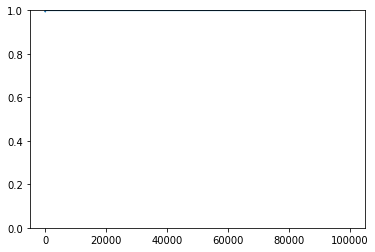

In [11]:
perceptron = Perceptron()
wt_matrix = perceptron.fit(X_train, Y_train, 100000, 0.075)

In [12]:
test = df5.copy()
test['ImageId']= L10
ImageId = test['ImageId']
test1 = test.drop('ImageId', axis = 1)

In [13]:
sc.fit(test1)
test1 = sc.transform(test1)
Y_pred_test = perceptron.predict(test1)
print(Y_pred_test)

[0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0
 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1
 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0
 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 1 1 0]


In [14]:
dft = pd.DataFrame(Y_pred_test)
d = pd.concat([ImageId,dft],axis=1)
d.columns = ['ImageId','Class']
d['Class'].replace(True,'1',inplace = True)
d['Class'].replace(False,'0',inplace = True)
d = d[['ImageId', 'Class']]
d.groupby('Class').count()

,ImageId
Class,
0,153
1,147


In [15]:
d.to_csv("submission.csv", index=False)